#Directory, Libraries and Data

In [ ]:
%cd /content/drive/MyDrive/Datasets

/content/drive/MyDrive/Datasets


In [ ]:
#Libraries
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
#Load the data
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#Data Analysis

In [ ]:
#summary statistics
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
#NULL Count
null_count = df.isnull().sum().sum()
print('Number of null values:', null_count)

Number of null values: 0


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

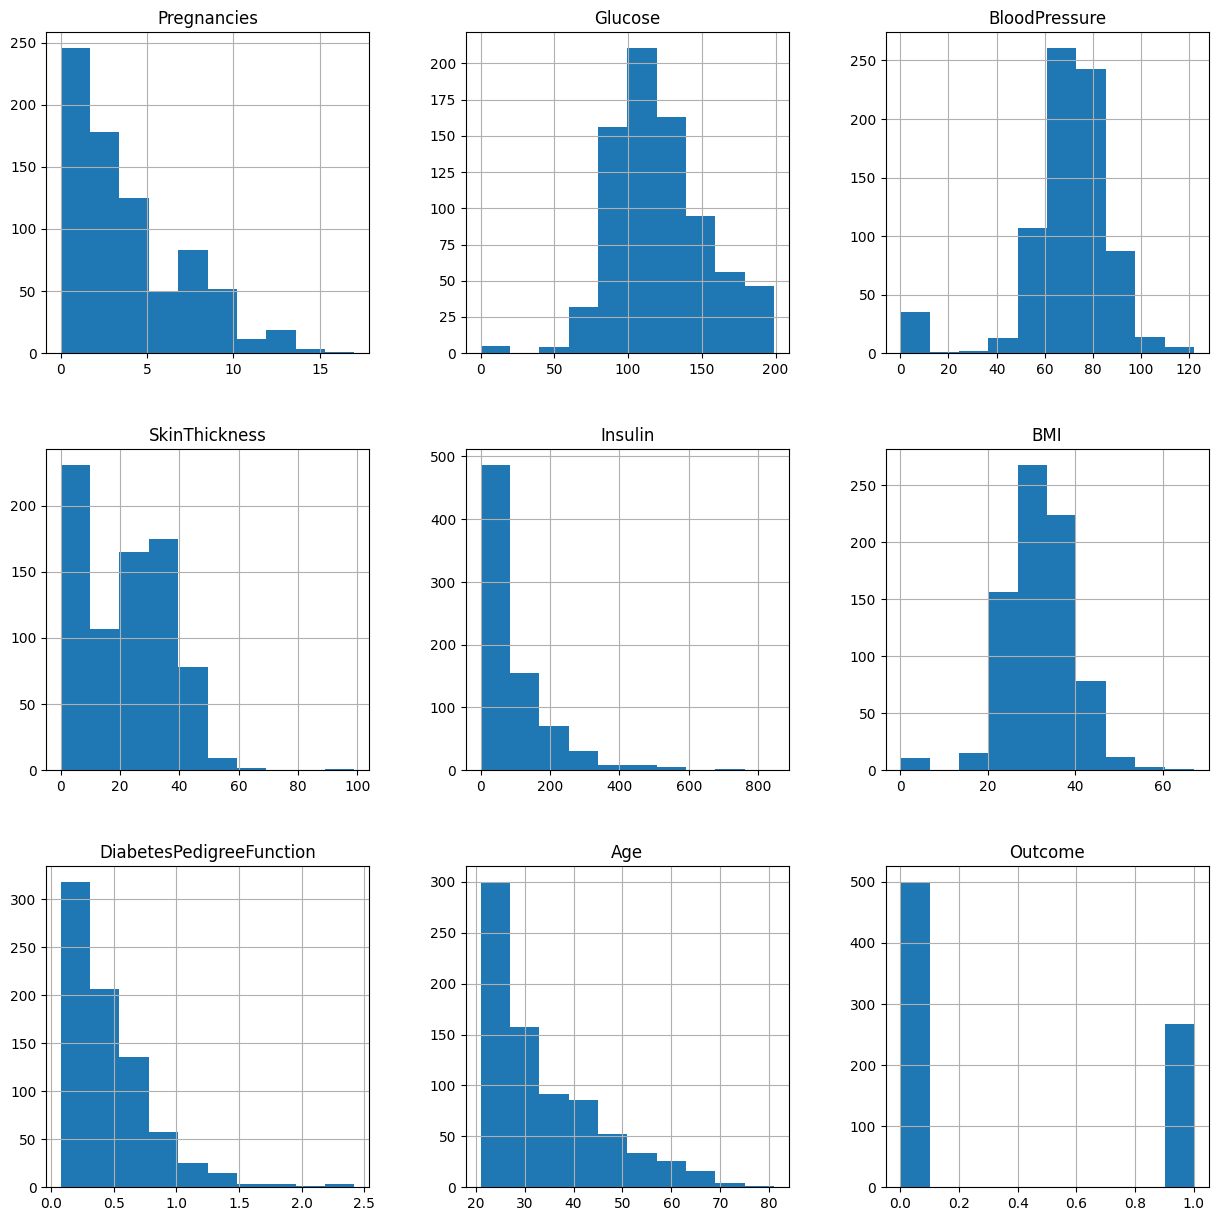

In [ ]:
#histograms
df.hist(figsize =(15,15))

<Axes: >

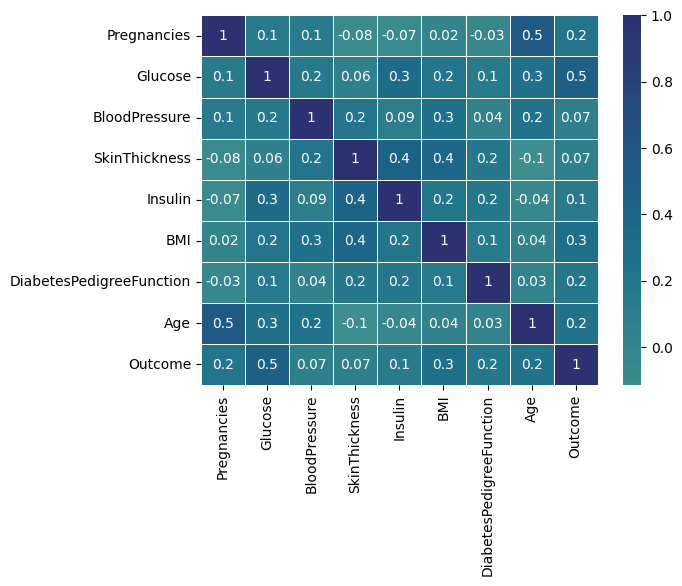

In [ ]:
#Correlation matrix
#plt.figure(figsize = (15,15))
sns.heatmap(df.corr(numeric_only = True),
            annot = True,
            fmt ='.1g',
            center = 0,
            cmap = 'crest',
            linewidths = .5,
            linecolor = 'white')

#Logisitc Regression Prep

In [ ]:
#Prepare x and y
y = df.Outcome
x = df.drop(columns=["Outcome"])
x = sm.add_constant(x)
x.head(3)

,const,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1.0,6,148,72,35,0,33.6,0.627,50
1,1.0,1,85,66,29,0,26.6,0.351,31
2,1.0,8,183,64,0,0,23.3,0.672,32


In [ ]:
#Training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.2,
                                                    random_state = 1502)

#Logistic Regression

In [ ]:
#Logistic Refression
model = sm.Logit(y_train, x_train).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.486044
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  614
Model:                          Logit   Df Residuals:                      605
Method:                           MLE   Df Model:                            8
Date:                Fri, 12 Jan 2024   Pseudo R-squ.:                  0.2482
Time:                        11:19:16   Log-Likelihood:                -298.43
converged:                       True   LL-Null:                       -396.97
Covariance Type:            nonrobust   LLR p-value:                 2.631e-38
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -7.6786      0.758    -10.129      0.000      -9.164

In [ ]:
#Create the function to read the output of Logistic regression
def logistic_reader(coefficient):
  probability = round((np.exp(coefficient)-1) * 100, 2)
  if probability > 0:
    print("The likelihood increases by", probability,"%")
  elif probability == 0:
    print("No impact")
  else:
    print("The likelihood decreases by", probability,"%")

#Assess the model

In [ ]:
#predictions
predictions = model.predict(x_test)
predictions = np.where(predictions > 0.5, 1,0)
predictions[:10]

array([0, 1, 1, 0, 1, 0, 0, 0, 0, 0])

In [ ]:
#Check if dataset is balance
y_test.mean()

0.35064935064935066

In [ ]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predictions))
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
(tn, fp, fn, tp)

[[94  6]
 [21 33]]


(94, 6, 21, 33)

In [ ]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.94      0.87       100
           1       0.85      0.61      0.71        54

    accuracy                           0.82       154
   macro avg       0.83      0.78      0.79       154
weighted avg       0.83      0.82      0.82       154



In [ ]:
#Accuracy KPI
accuracy = (tp + tn) / (tn + fp + fn + tp)
print("Accuracy:", round(accuracy * 100,2),"%")

#F1 Score KPI
f1 = 2 * tp / (2 * tp + fn + fp)
print("F1 Score:", round(f1 * 100,2),"%")

#Specificity KPI
specificity = tn / (tn + fp)
print("Specificity:", round(specificity * 100,2),"%")

#Sensitivity KPI
sensitivity = tp / (tp + fn)
print("Sensitiivity:", round(sensitivity * 100,2),"%")

Accuracy: 82.47 %
F1 Score: 70.97 %
Specificity: 94.0 %
Sensitiivity: 61.11 %
